In [ ]:
%matplotlib inline

In [2]:
basedir='/home/rms101/SCRIPTS/amoc_stab/'
import sys
sys.path.append(basedir + 'MODS')
import os
import cmipdata as cd
import numpy as np
import matplotlib.pyplot as plt # for basic plotting
import nc as nc
import rms_plots as rpl
import rms_utils as rut
from scipy import stats
################settings


1a. Calculate Climatologies
###############################################################

In [11]:
rundir='/home/rms101/SCRIPTS/amoc_stab/FIG3_TAS_NA/';os.chdir(rundir)
srcdir_base='/space/hall3/sitestore/eccc/crd/cetus3_data/CCCma_Output'   
datadir='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/DATA/amoc_stab_post'
     
do_calc=True
varnm='tas'
if do_calc:
    os.system('mkdir -p {}/DATA_{}_reg'.format(datadir,varnm))
    os.chdir('{}/DATA_{}_reg'.format(datadir,varnm))
    os.system('/bin/rm *.nc')

    # all historical 
    #os.system('ln -s ' + srcdir_base +'/CanSISE/historical-r*/mon/'+varnm+'/*.nc .')
    os.system('ln -s ' + srcdir_base +'/LOWWARMING/*/*/*/lowwarming15/mon/atmos/'+varnm+'/*/*.nc .')
    os.system('ln -s ' + srcdir_base +'/LOWWARMING/*/*/*/lowwarming20/mon/atmos/'+varnm+'/*/*.nc .')
    os.system('ln -s ' + srcdir_base +'/LOWWARMING/*/*/*/lowwarming30/mon/atmos/'+varnm+'/*/*.nc .')

    # concat
    #ens_his = cd.mkensemble('*historical-r*')
    #ens_his = cd.cat_exp_slices(ens_his)
    ens_15c1 = cd.mkensemble('*lowwarming15*_r*i1p1_20??01-2???12.nc') #all up to 2100
    ens_15c1 = cd.cat_exp_slices(ens_15c1)
    ens_15c2 = cd.mkensemble('*lowwarming15*_r[1-5]i1p1_2[1-6]??01-2???12.nc') #1-5 past 2100
    ens_15c2 = cd.cat_exp_slices(ens_15c2)
    ens_20c1 = cd.mkensemble('*lowwarming20*_r*i1p1_20??01-2???12.nc') #all up to 2100
    ens_20c1 = cd.cat_exp_slices(ens_20c1)
    ens_20c2 = cd.mkensemble('*lowwarming20*_r[1-5]i1p1_2[1-6]??01-2???12.nc') #1-5 past 2100
    ens_20c2 = cd.cat_exp_slices(ens_20c2)
    ens_30c1 = cd.mkensemble('*lowwarming30*_r*i1p1_20??01-2???12.nc') #all up to 2100
    ens_30c1 = cd.cat_exp_slices(ens_30c1)
    ens_30c2 = cd.mkensemble('*lowwarming30*_r[1-5]i1p1_2[1-6]??01-2???12.nc') #1-5 past 2100
    ens_30c2 = cd.cat_exp_slices(ens_30c2)

    ### annual mean on both ensembles
    my_cdo_str='cdo -yearmean {infile} {outfile}' 

    ens_15c1=cd.my_operator(ens_15c1, my_cdo_str, output_prefix='am_',delete=True)
    ens_15c2=cd.my_operator(ens_15c2, my_cdo_str, output_prefix='am_',delete=True)

    ens_20c1=cd.my_operator(ens_20c1, my_cdo_str, output_prefix='am_',delete=True)
    ens_20c2=cd.my_operator(ens_20c2, my_cdo_str, output_prefix='am_',delete=True)

    ens_30c1=cd.my_operator(ens_30c1, my_cdo_str, output_prefix='am_',delete=True)
    ens_30c2=cd.my_operator(ens_30c2, my_cdo_str, output_prefix='am_',delete=True)

    ### global mean on both ensembles
    my_cdo_str='cdo -fldmean {infile} {outfile}' 

    ens_15c1_gm=cd.my_operator(ens_15c1, my_cdo_str, output_prefix='gm',delete=False)
    ens_15c2_gm=cd.my_operator(ens_15c2, my_cdo_str, output_prefix='gm',delete=False)
    
    ens_20c1_gm=cd.my_operator(ens_20c1, my_cdo_str, output_prefix='gm',delete=False)
    ens_20c2_gm=cd.my_operator(ens_20c2, my_cdo_str, output_prefix='gm',delete=False)

    ens_30c1_gm=cd.my_operator(ens_30c1, my_cdo_str, output_prefix='gm',delete=False)
    ens_30c2_gm=cd.my_operator(ens_30c2, my_cdo_str, output_prefix='gm',delete=False)

else:    
    os.chdir('{}/DATA_{}_reg'.format(datadir,varnm))

    ens_15c1 = cd.mkensemble('am_*lowwarming15*_r*i1p1_20??01-2???12.nc',prefix='am_') #all up to 2100
    ens_20c1 = cd.mkensemble('am_*lowwarming20*_r*i1p1_20??01-2???12.nc',prefix='am_') #all up to 2100
    ens_30c1 = cd.mkensemble('am_*lowwarming30*_r*i1p1_20??01-2???12.nc',prefix='am_') #all up to 2100

    ens_15c2 = cd.mkensemble('am_*lowwarming15*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='am_') #1-5 past 2100
    ens_20c2 = cd.mkensemble('am_*lowwarming20*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='am_') #1-5 past 2100
    ens_30c2 = cd.mkensemble('am_*lowwarming30*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='am_') #1-5 past 2100

    ens_15c1_gm = cd.mkensemble('gmam_*lowwarming15*_r*i1p1_20??01-2???12.nc',prefix='gmam_') #all up to 2100
    ens_20c1_gm = cd.mkensemble('gmam_*lowwarming20*_r*i1p1_20??01-2???12.nc',prefix='gmam_') #all up to 2100
    ens_30c1_gm = cd.mkensemble('gmam_*lowwarming30*_r*i1p1_20??01-2???12.nc',prefix='gmam_') #all up to 2100

    ens_15c2_gm = cd.mkensemble('gmam_*lowwarming15*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='gmam_') #1-5 past 2100
    ens_20c2_gm = cd.mkensemble('gmam_*lowwarming20*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='gmam_') #1-5 past 2100
    ens_30c2_gm = cd.mkensemble('gmam_*lowwarming30*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='gmam_') #1-5 past 2100


tas_15c1=cd.loadfiles(ens_15c1,'tas')['data']
tas_20c1=cd.loadfiles(ens_20c1,'tas')['data']
tas_30c1=cd.loadfiles(ens_30c1,'tas')['data']

tas_15c2=cd.loadfiles(ens_15c2,'tas')['data']
tas_20c2=cd.loadfiles(ens_20c2,'tas')['data']
tas_30c2=cd.loadfiles(ens_30c2,'tas')['data']


lon=cd.loadfiles(ens_15c1,'tas')['dimensions']['lon']; nlon=lon.size
lat=cd.loadfiles(ens_15c1,'tas')['dimensions']['lat']; nlat=lat.size

os.chdir(rundir)
   

##lonlat
#lon=nc.getvar('DATA_tas/15c_em.nc','lon');nlon=np.shape(lon)[0]
#lat=nc.getvar('DATA_tas/15c_em.nc','lat');nlat=np.shape(lat)[0]


This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
100 ncfiles

 For more details use ens.fulldetails() 

joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
50 ncfiles

 For more details use ens.fulldetails() 

joining files
joining files
joining files


1b. Calculate tas_pi#
###############################################################

In [12]:
calc_tas_pi=False

if calc_tas_pi:
    os.system('mkdir -p {}/DATA_TAS_PI'.format(datadir))
    os.chdir('{}/DATA_TAS_PI'.format(datadir))
    os.system('/bin/rm *.nc')
    os.system('ln -s '+srcdir_base+'/CMIP5/output/CCCma/CanESM2/piControl/mon/atmos/tas/r1i1p1/tas_Amon_CanESM2_piControl_r1i1p1*.nc .')
    # concat
    ens_tas_pi = cd.mkensemble('tas_Amon_CanESM2_piControl*')
    ens_tas_pi = cd.cat_exp_slices(ens_tas_pi)
    # annual mean
    my_cdo_str='cdo -yearmean {infile} {outfile}' 
    ens_tas_pi_am=cd.my_operator(ens_tas_pi, my_cdo_str, output_prefix='am_',delete=True)
    # glob mean
    my_cdo_str='cdo -fldmean {infile} {outfile}' 
    ens_tas_pi_am_gm=cd.my_operator(ens_tas_pi_am, my_cdo_str, output_prefix='gm_',delete=False)
else:
    os.chdir(datadir+'/DATA_TAS_PI')
    ens_tas_pi_am=cd.mkensemble('am_tas_Amon*',prefix='am_')
    ens_tas_pi_am_gm=cd.mkensemble('gm_am_tas_Amon*',prefix='gm_am_')

datadict_tas_pi_am = cd.loadfiles(ens_tas_pi_am,'tas')
datadict_tas_pi_am_gm = cd.loadfiles(ens_tas_pi_am_gm,'tas')

tas_pi=np.squeeze(datadict_tas_pi_am['data'])
tas_pi_gm=np.squeeze(datadict_tas_pi_am_gm['data'])

os.chdir(rundir)

This ensemble contains:
1 variables
1 models
1 experiments
1 realizations
1 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
1 realizations
1 ncfiles

 For more details use ens.fulldetails() 



2. dtas_XX_clims = tas_XXx_clim - tas_pi_clim
#####################################################

In [13]:
tas_pi_clim=np.mean(tas_pi,axis=0) #nlat,nlon
tas_pi_clim_gm=np.mean(tas_pi_gm,axis=0)

years_151=np.arange(2021,2100+1)
years_201=np.arange(2036,2100+1)
years_301=np.arange(2061,2100+1)
years2=np.arange(2101,2600+1)

# TAS anomaly (lon,lat) at branch off time (1y and 50 ensemble mean)
tas_15_brch=tas_15c1[:,0,:,:].squeeze()
tas_20_brch=tas_20c1[:,0,:,:].squeeze()
tas_30_brch=tas_30c1[:,0,:,:].squeeze()

tas_15_brch_r_em=np.mean(tas_15_brch,axis=0)-tas_pi_clim
tas_20_brch_r_em=np.mean(tas_20_brch,axis=0)-tas_pi_clim
tas_30_brch_r_em=np.mean(tas_30_brch,axis=0)-tas_pi_clim

# TAS anomaly (lon,lat) at the year 2200 (10y and 5 ensemble mean)
tas_15_2200=tas_15c2[:,(2196-2101):(2205+1-2101),:,:].reshape(50,nlat,nlon)
tas_20_2200=tas_20c2[:,(2196-2101):(2205+1-2101),:,:].reshape(50,nlat,nlon)
tas_30_2200=tas_30c2[:,(2196-2101):(2205+1-2101),:,:].reshape(50,nlat,nlon)

tas_15_2200_r_em=np.mean(tas_15_2200,axis=0)-tas_pi_clim
tas_20_2200_r_em=np.mean(tas_20_2200,axis=0)-tas_pi_clim
tas_30_2200_r_em=np.mean(tas_30_2200,axis=0)-tas_pi_clim

# Significance of difference
sig_tas_15c=np.zeros_like(tas_15_brch_r_em); 
sig_tas_20c=np.zeros_like(tas_15_brch_r_em); 
sig_tas_30c=np.zeros_like(tas_15_brch_r_em); 

sig_tas_15c[stats.ttest_ind(tas_15_brch,tas_15_2200)[1]<0.05]=0.01
sig_tas_20c[stats.ttest_ind(tas_20_brch,tas_20_2200)[1]<0.05]=0.01
sig_tas_30c[stats.ttest_ind(tas_30_brch,tas_30_2200)[1]<0.05]=0.01


3. Plot clim
#####################################################
clevs=np.array([-2.75,-2.25,-1.75,-1.25,-0.75,-0.25,0.25,0.75,1.25,1.75,2.25])

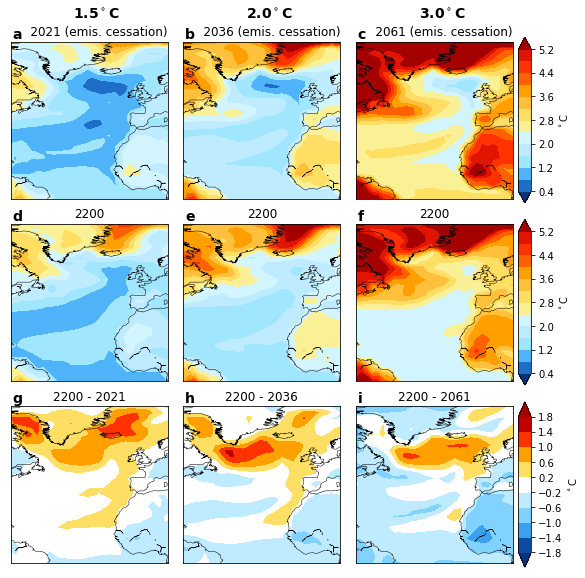

In [14]:
clevs=np.array([0.4,0.8,1.2,1.6,2.0,2.4,2.8,3.2,3.6,4.0,4.4,4.8,5.2])
cmapi=np.array([0,2,4,6,7,8,10,11,12,13,14,15,16,18])

cint0=0.2

ncol=3; nrow=3
bmparams=dict(region='na')
cfparams=dict(clevs=clevs,plot_co=False,cmapi=cmapi)

##########Clims 1
fig, axs = plt.subplots(nrow,ncol, figsize=(ncol*3,nrow*3.25)); 
plt.subplots_adjust(wspace=0.1,hspace=0.1)
##########Clims 1
ax=axs[0,0] 
bm=rpl.make_bm(ax,**bmparams)
cf=rpl.add_cf(bm,lon,lat,tas_15_brch_r_em,**cfparams)   
rpl.add_title(ax,'     2021 (emis. cessation)','a')
plt.text(0.4,1.15,'1.5$^\circ$C',fontsize=14,transform=axs[0,0].transAxes,fontweight='bold')

ax=axs[0,1] 
bm=rpl.make_bm(ax,**bmparams)
cf=rpl.add_cf(bm,lon,lat,tas_20_brch_r_em,**cfparams)   
rpl.add_title(ax,'     2036 (emis. cessation)','b')
plt.text(0.4,1.15,'2.0$^\circ$C',fontsize=14,transform=axs[0,1].transAxes,fontweight='bold')

ax=axs[0,2] 
bm=rpl.make_bm(ax,**bmparams)
cf=rpl.add_cf(bm,lon,lat,tas_30_brch_r_em,**cfparams)   
rpl.add_title(ax,'     2061 (emis. cessation)','c')
plt.text(0.4,1.15,'3.0$^\circ$C',fontsize=14,transform=axs[0,2].transAxes,fontweight='bold')

rpl.add_cb(ax,cf,units='$^\circ$C')

##########Clims 2
ax=axs[1,0] 
bm=rpl.make_bm(ax,**bmparams)
cf=rpl.add_cf(bm,lon,lat,tas_15_2200_r_em,**cfparams)   
rpl.add_title(ax,'2200','d')

ax=axs[1,1] 
bm=rpl.make_bm(ax,**bmparams)
cf=rpl.add_cf(bm,lon,lat,tas_20_2200_r_em,**cfparams)   
rpl.add_title(ax,'2200','e')

ax=axs[1,2] 
bm=rpl.make_bm(ax,**bmparams)
cf=rpl.add_cf(bm,lon,lat,tas_30_2200_r_em,**cfparams)   
rpl.add_title(ax,'2200','f')
rpl.add_cb(ax,cf,units='$^\circ$C')

##########Diff
cfparams=dict(cint0=0.4,plot_co=False)
ax=axs[2,0] 
bm=rpl.make_bm(ax,**bmparams)
cf=rpl.add_cf(bm,lon,lat,tas_15_2200_r_em-tas_15_brch_r_em,**cfparams)   
rpl.add_title(ax,'2200 - 2021','g')
#lons,lats=np.meshgrid(lon[100:nlon],lat)
#cf=rpl.add_cf(bm,lon,lat,sig_tas_15c*100,**cfparams)   
#bm.scatter(lons,lats,sig_tas_15c[:,100:nlon], facecolor='black')



ax=axs[2,1] 
bm=rpl.make_bm(ax,**bmparams)
cf=rpl.add_cf(bm,lon,lat,tas_20_2200_r_em-tas_20_brch_r_em,**cfparams)   
rpl.add_title(ax,'2200 - 2036','h')

#lons,lats=np.meshgrid(lon,lat)
#cf=rpl.add_cf(bm,lon,lat,sig_tas_20c*100,**cfparams)   
#bm.scatter(lons,lats,sig_tas_20c, facecolor='black',latlon=True)


ax=axs[2,2] 
bm=rpl.make_bm(ax,**bmparams)
cf=rpl.add_cf(bm,lon,lat,tas_30_2200_r_em-tas_30_brch_r_em,**cfparams)   
rpl.add_title(ax,'2200 - 2061','i')
rpl.add_cb(ax,cf,units='$^\circ$C')

#lons,lats=np.meshgrid(lon,lat)
#cf=rpl.add_cf(bm,lon,lat,sig_tas_30c*100,**cfparams)   
#bm.scatter(lons,lats,sig_tas_30c, facecolor='black',latlon=True)



##########save  
rpl.mysavefig(fig,'fig3.png')
rpl.mysavefig(fig,'fig3.pdf')



#cbar
#rpl.add_cb(axs[1],cf,units='$^\circ$C ',y0scale=2.5,hscale=0.5)
#suptitle
#fig.suptitle(('Surf. Temp. trends ' + str(year1) + '-' + str(year2)),y=0.72,fontsize=16)
#save
#rpl.mysavefig(fig,'tas_clim1+2+diff.png')
